In [2]:
#importing dataset
from sklearn.datasets import make_blobs
#import kmeans clustering
from sklearn.cluster import KMeans
#importing silhouette parameters
from sklearn.metrics import silhouette_samples, silhouette_score


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [4]:
#Generating sample data from make_blobs
#7 centroids 
#Generating X and y data randomly.(used in performing clustering algorithms)

X, y = make_blobs(n_samples=800,
    n_features=4,
    centers=7,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1)

In [5]:
range_clust = [2, 3, 4, 5, 6, 7, 8, 9]
#used to find different clusters to find silhouetter score

In [8]:
X #with 4 features

array([[ -1.88188805,   4.2057318 ,  -9.81115111,  -3.5432969 ],
       [ -3.04108447,   1.0904033 ,  -7.18050572,  -4.82987076],
       [ -1.7288886 ,   4.2980978 ,  -9.54755699,  -2.18801345],
       ...,
       [ -2.53115081,   1.12963577,  -8.7323403 ,  -5.61737683],
       [  6.38355707,   9.46986384,  -4.07580559,   3.78563484],
       [  8.05604155,   7.5244013 ,  -7.60739491, -10.01725108]])

In [10]:
y #with 1 feature-belongs to specific class

array([0, 4, 0, 6, 4, 3, 5, 1, 4, 2, 2, 6, 5, 2, 6, 5, 5, 3, 1, 6, 5, 0,
       5, 6, 3, 2, 2, 5, 0, 0, 6, 3, 5, 4, 6, 0, 1, 1, 0, 3, 0, 0, 1, 5,
       0, 4, 5, 3, 6, 6, 6, 5, 6, 4, 3, 6, 3, 2, 4, 4, 1, 3, 4, 3, 3, 6,
       2, 0, 4, 4, 3, 2, 2, 2, 5, 4, 2, 2, 4, 1, 6, 4, 3, 1, 6, 0, 2, 5,
       6, 6, 6, 5, 1, 6, 0, 6, 1, 3, 4, 6, 4, 3, 2, 2, 3, 5, 0, 4, 6, 1,
       5, 1, 6, 2, 5, 6, 3, 0, 1, 5, 3, 1, 2, 4, 1, 5, 3, 0, 6, 6, 0, 1,
       2, 4, 2, 6, 0, 0, 5, 1, 0, 2, 1, 2, 5, 1, 0, 5, 3, 6, 2, 1, 5, 5,
       1, 0, 3, 2, 3, 2, 4, 4, 0, 3, 5, 4, 6, 4, 0, 2, 2, 1, 6, 2, 2, 6,
       6, 0, 2, 0, 0, 2, 4, 4, 3, 3, 5, 0, 6, 3, 6, 2, 3, 1, 4, 1, 0, 0,
       3, 5, 3, 1, 0, 5, 0, 3, 2, 4, 2, 0, 2, 3, 4, 2, 3, 1, 1, 1, 6, 1,
       3, 4, 1, 6, 1, 4, 3, 3, 1, 6, 1, 0, 6, 6, 4, 1, 2, 5, 0, 4, 5, 1,
       3, 6, 1, 0, 4, 0, 1, 2, 6, 6, 5, 6, 1, 2, 0, 4, 0, 0, 2, 1, 0, 4,
       4, 6, 5, 6, 5, 3, 6, 3, 1, 1, 3, 0, 1, 0, 3, 5, 5, 5, 1, 5, 4, 5,
       4, 5, 3, 2, 0, 1, 1, 1, 0, 6, 1, 1, 1, 5, 3,

In [12]:
#applying k-means clustering algorithm:

wcss = [] #within cluster sum of square- summation of distance

for i in range(1,15): #diff k/centroid values to see which is minimal wcss value
    #intialization technique kmeans++ so that the points (centroid) are very far initialized.
    k_means = KMeans(n_clusters=i,
    init='k-means++',
    random_state=0)
    k_means.fit(X)
    wcss.append(k_means.inertia_) # inertia will give the distance between centroid and all other points.


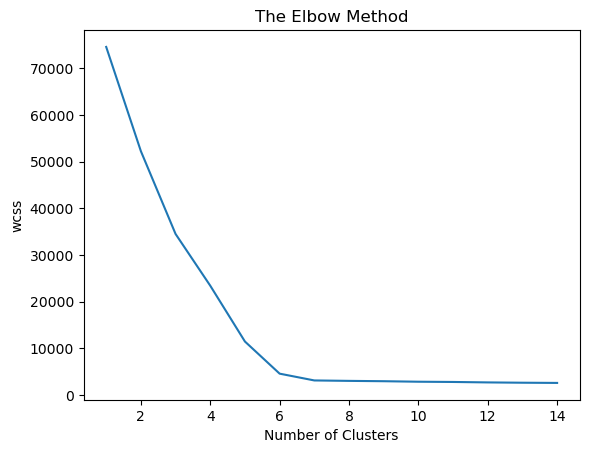

In [21]:
plt.plot(range(1,15),wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("wcss")
plt.show()

In [22]:
#Graph looks like elbow
#k value to be considered:
#Last abrupt change - 6 (from there changes are normal)

#Now with help of silhouette score going to compare k=6 valid or not

In [23]:
clustering = KMeans(n_clusters=6,
    random_state=10)
label_clust = clustering.fit_predict(X)
print(label_clust) # output or prediction with 6 clusters

[2 2 2 3 2 5 4 0 2 1 1 3 4 1 3 4 4 5 0 3 4 2 4 3 5 1 1 4 2 2 3 5 4 2 3 2 0
 0 2 5 2 2 0 4 2 2 4 5 3 3 3 4 3 2 5 3 5 1 2 2 0 5 2 5 5 3 1 2 2 2 5 1 1 1
 4 2 1 1 2 0 3 2 5 0 3 2 1 4 3 3 3 4 0 3 2 3 0 5 2 3 2 5 1 1 5 4 2 2 3 0 4
 0 3 1 4 3 5 2 0 4 5 0 1 2 0 4 5 2 3 3 2 0 1 2 1 3 2 2 4 0 2 1 0 1 4 0 2 4
 5 3 1 0 4 4 0 2 5 1 5 1 2 2 2 5 4 2 3 2 2 1 1 0 3 1 1 3 3 2 1 2 2 1 2 2 5
 5 4 2 3 5 3 1 5 0 2 0 2 2 5 4 5 0 2 4 2 5 1 2 1 2 1 5 2 1 5 0 0 0 3 0 5 2
 0 3 0 2 5 5 0 3 0 2 3 3 2 0 1 4 2 2 4 0 5 3 0 2 2 2 0 1 3 3 4 3 0 1 2 2 2
 2 1 0 2 2 2 3 4 3 4 5 3 5 0 0 5 2 0 2 5 4 4 4 0 4 2 4 2 4 5 1 2 0 0 0 2 3
 0 0 0 4 5 5 2 4 2 1 5 0 1 0 5 1 3 4 1 4 3 1 2 0 5 2 3 3 2 0 4 2 2 3 5 3 4
 3 4 2 1 3 1 2 5 4 0 4 5 1 1 1 0 2 2 0 4 3 2 5 2 2 1 2 5 2 4 1 2 4 2 2 5 5
 0 0 3 2 2 1 5 1 5 5 4 3 3 5 0 3 2 5 1 4 1 5 1 0 1 4 0 2 0 2 2 3 2 5 2 0 2
 1 4 5 5 1 3 4 2 0 0 0 4 2 0 0 4 2 5 0 3 2 1 5 3 0 4 0 2 4 4 2 3 2 2 5 1 2
 3 5 0 4 0 1 5 2 1 2 2 0 2 3 2 3 0 2 2 4 1 0 1 0 1 3 4 1 1 2 0 5 4 4 5 5 2
 2 1 0 2 3 3 3 2 3 2 5 3 

For n iterations of clusters = 2 The avg silhouette score is : 0.38917040590277674
For n iterations of clusters = 3 The avg silhouette score is : 0.4496503321474872
For n iterations of clusters = 4 The avg silhouette score is : 0.5103869666015001
For n iterations of clusters = 5 The avg silhouette score is : 0.6187768246266048
For n iterations of clusters = 6 The avg silhouette score is : 0.7149603735075293
For n iterations of clusters = 7 The avg silhouette score is : 0.688747978861027
For n iterations of clusters = 8 The avg silhouette score is : 0.6035944071205064
For n iterations of clusters = 9 The avg silhouette score is : 0.5549313229570434


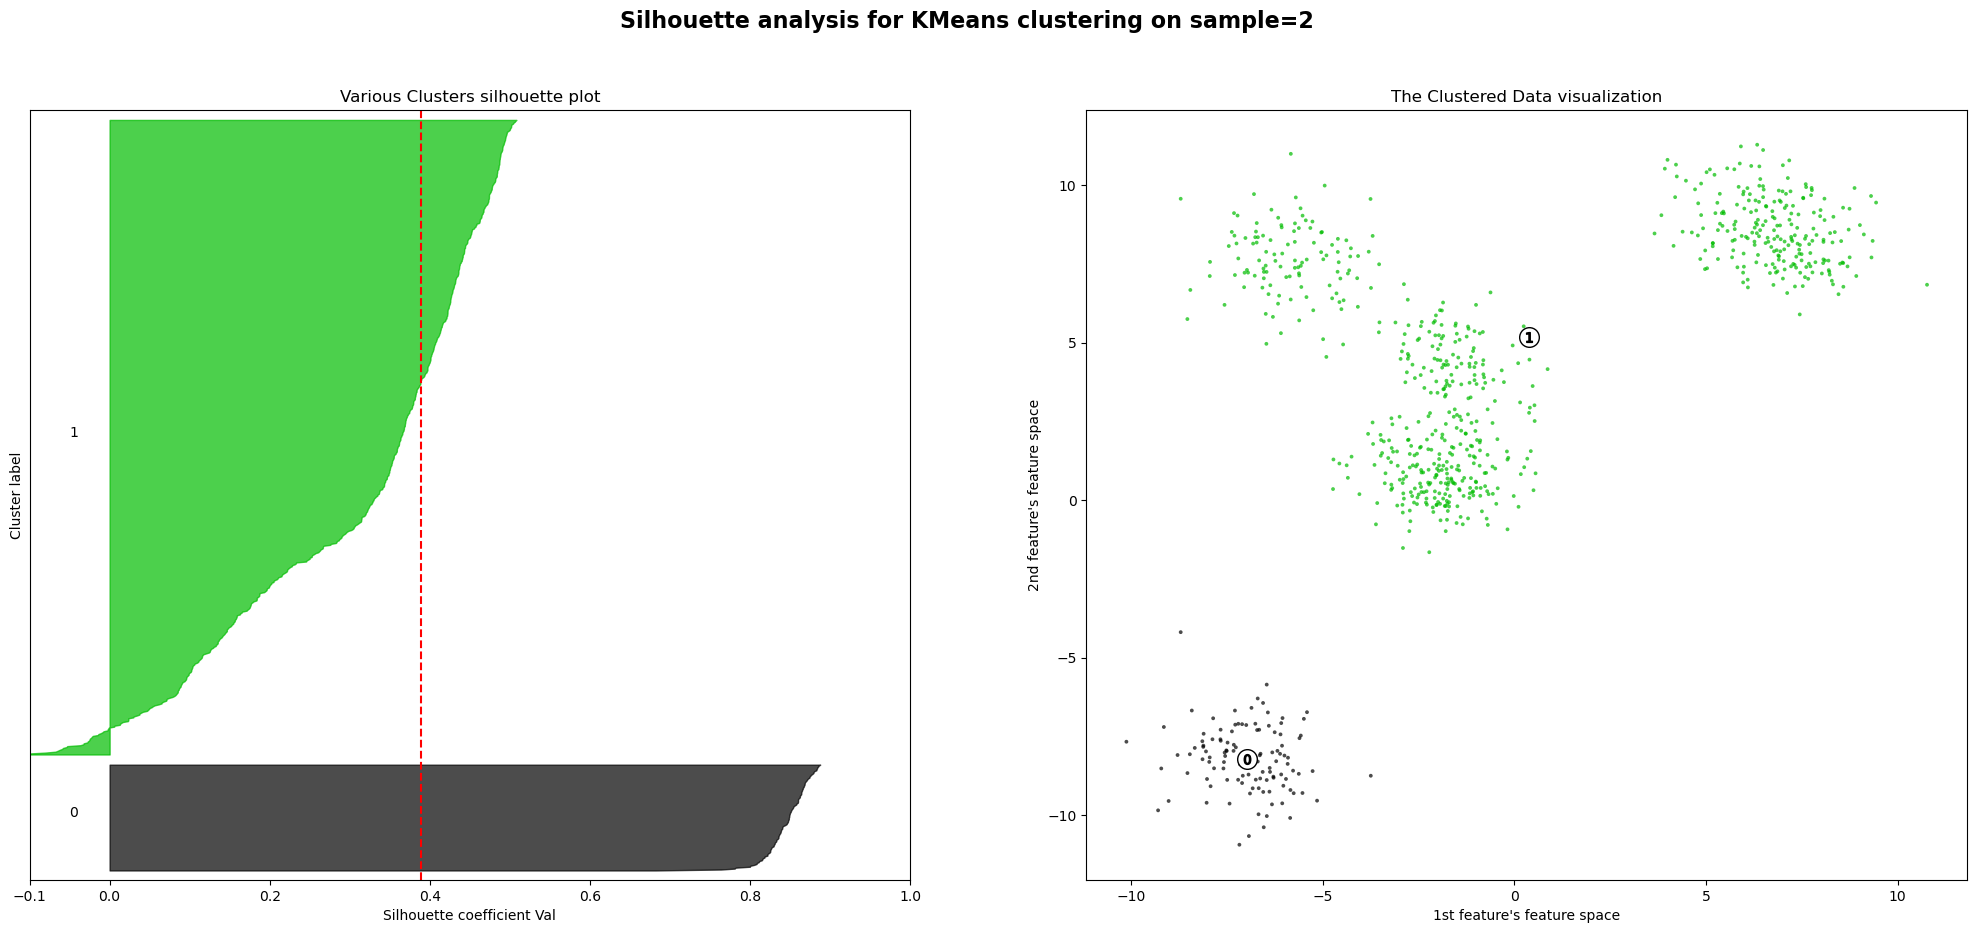

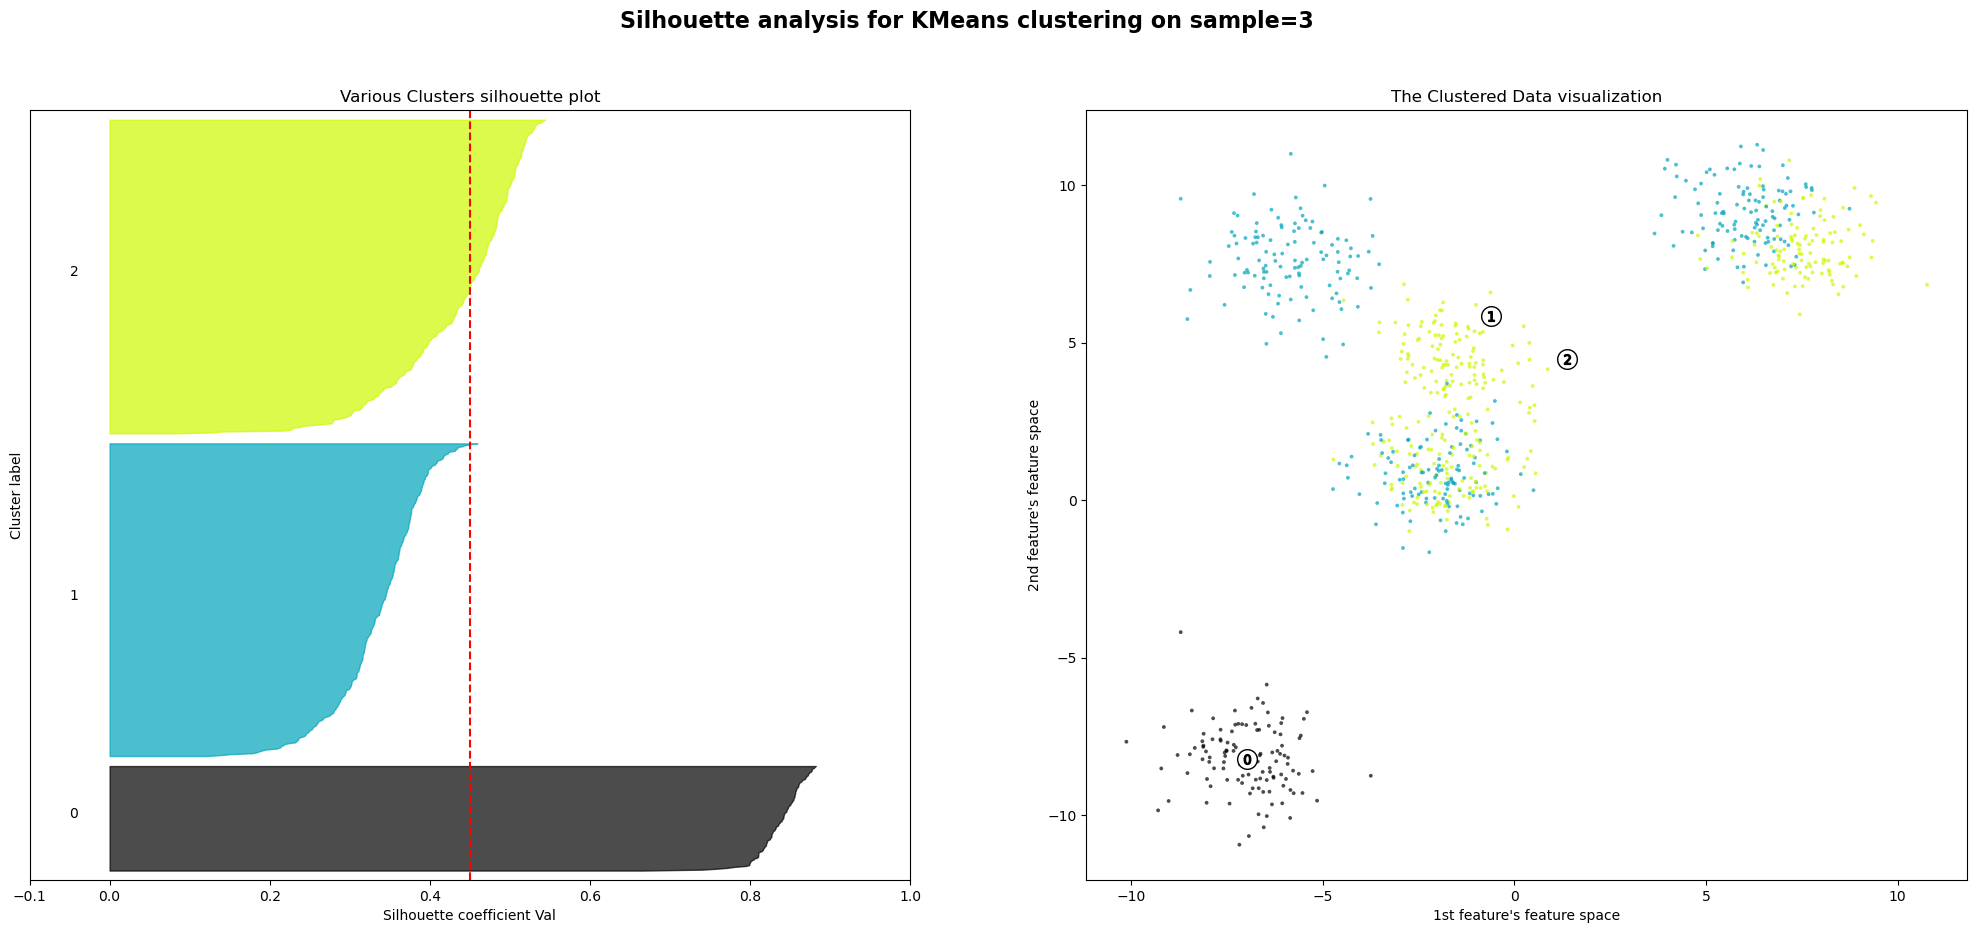

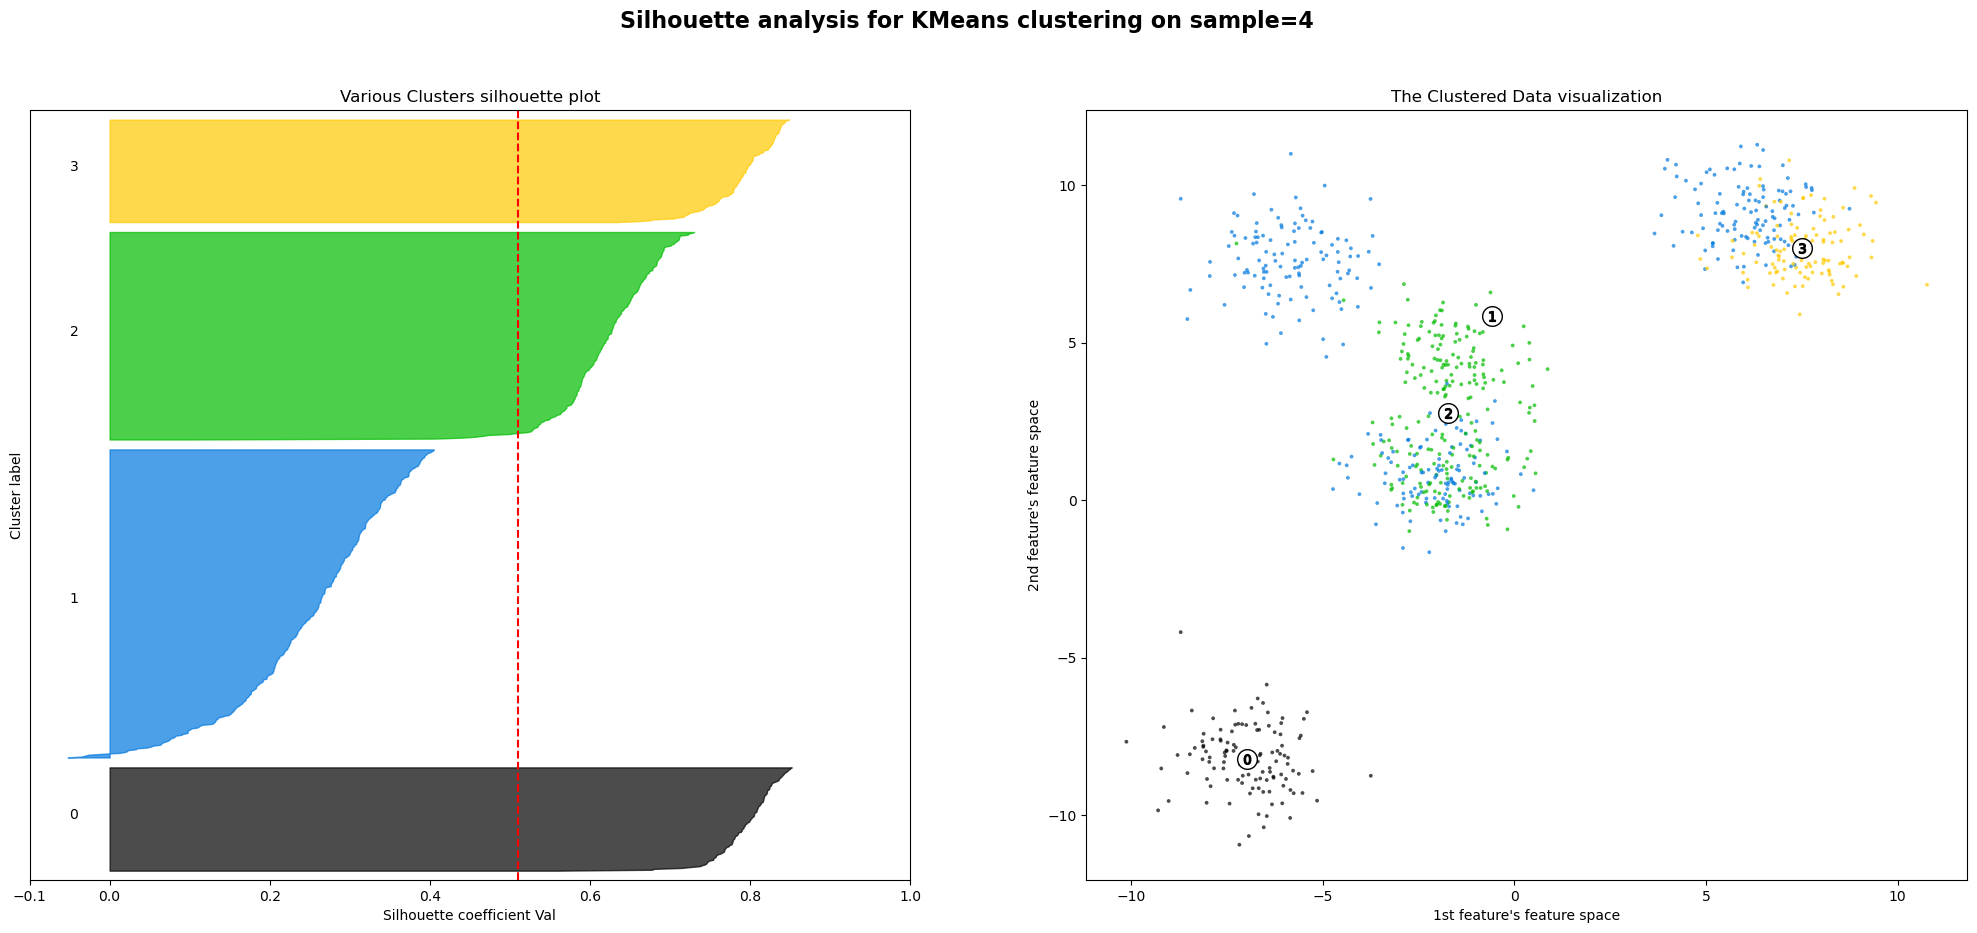

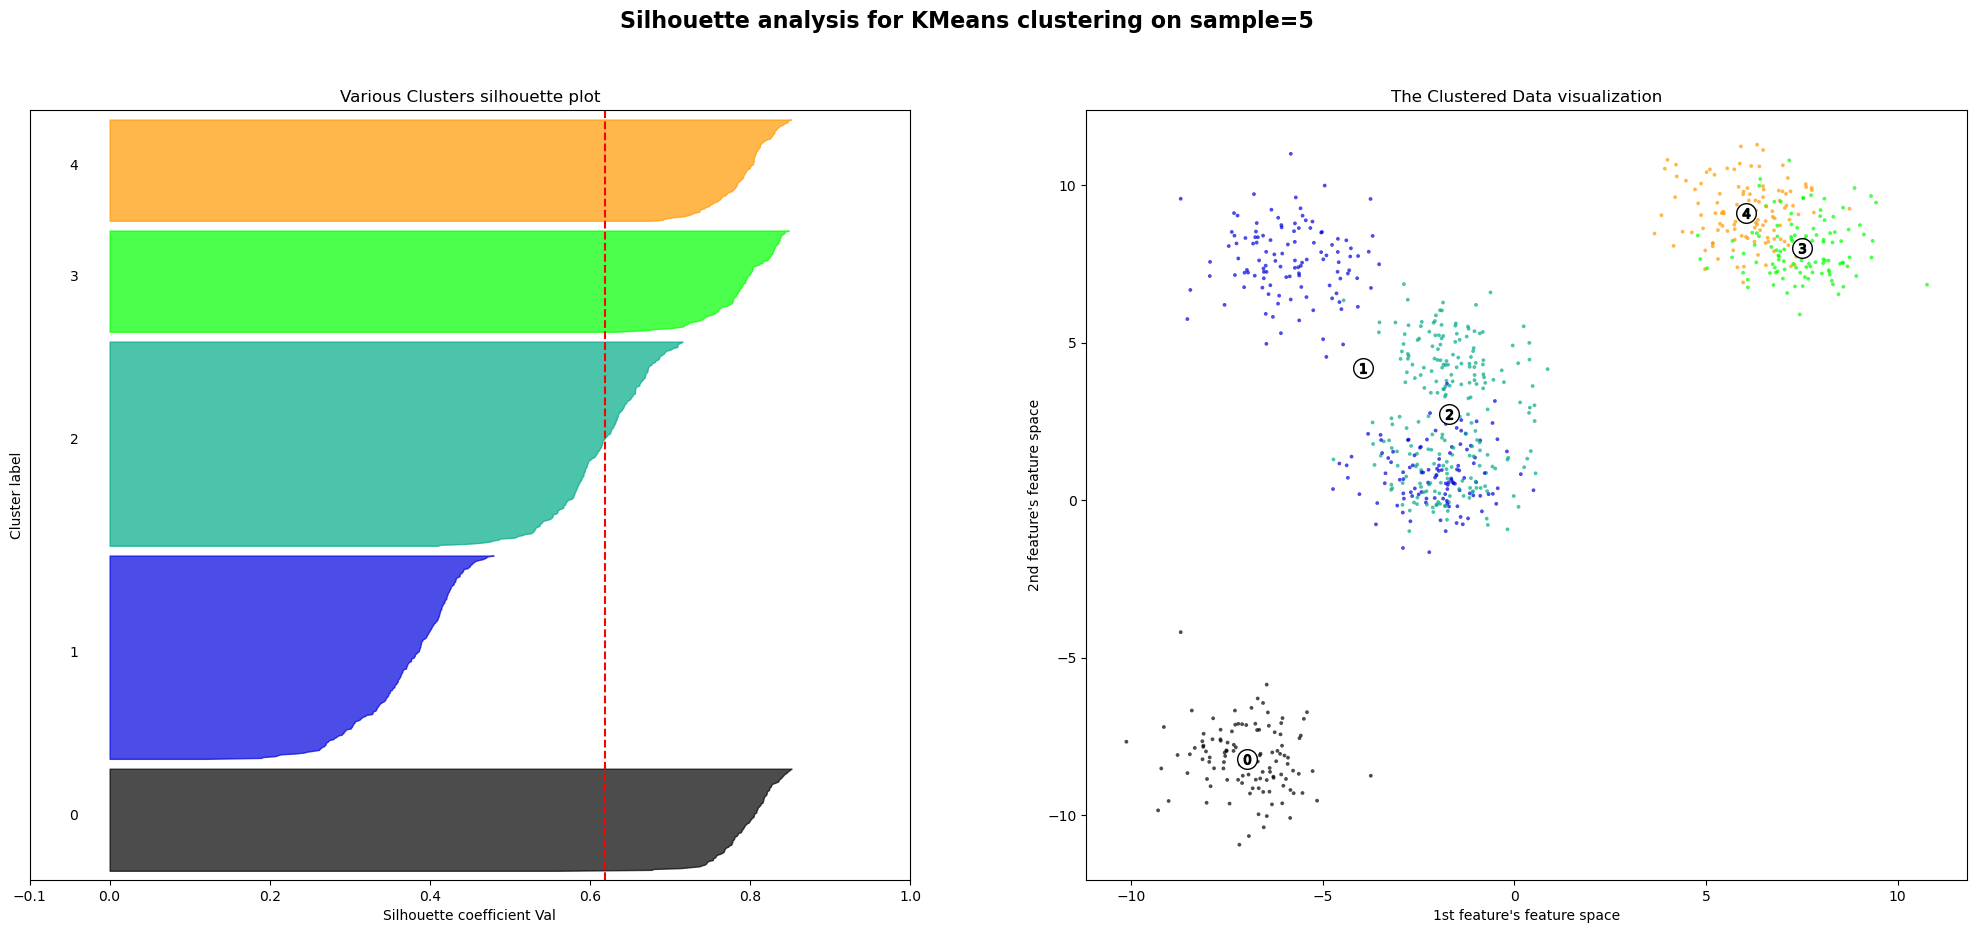

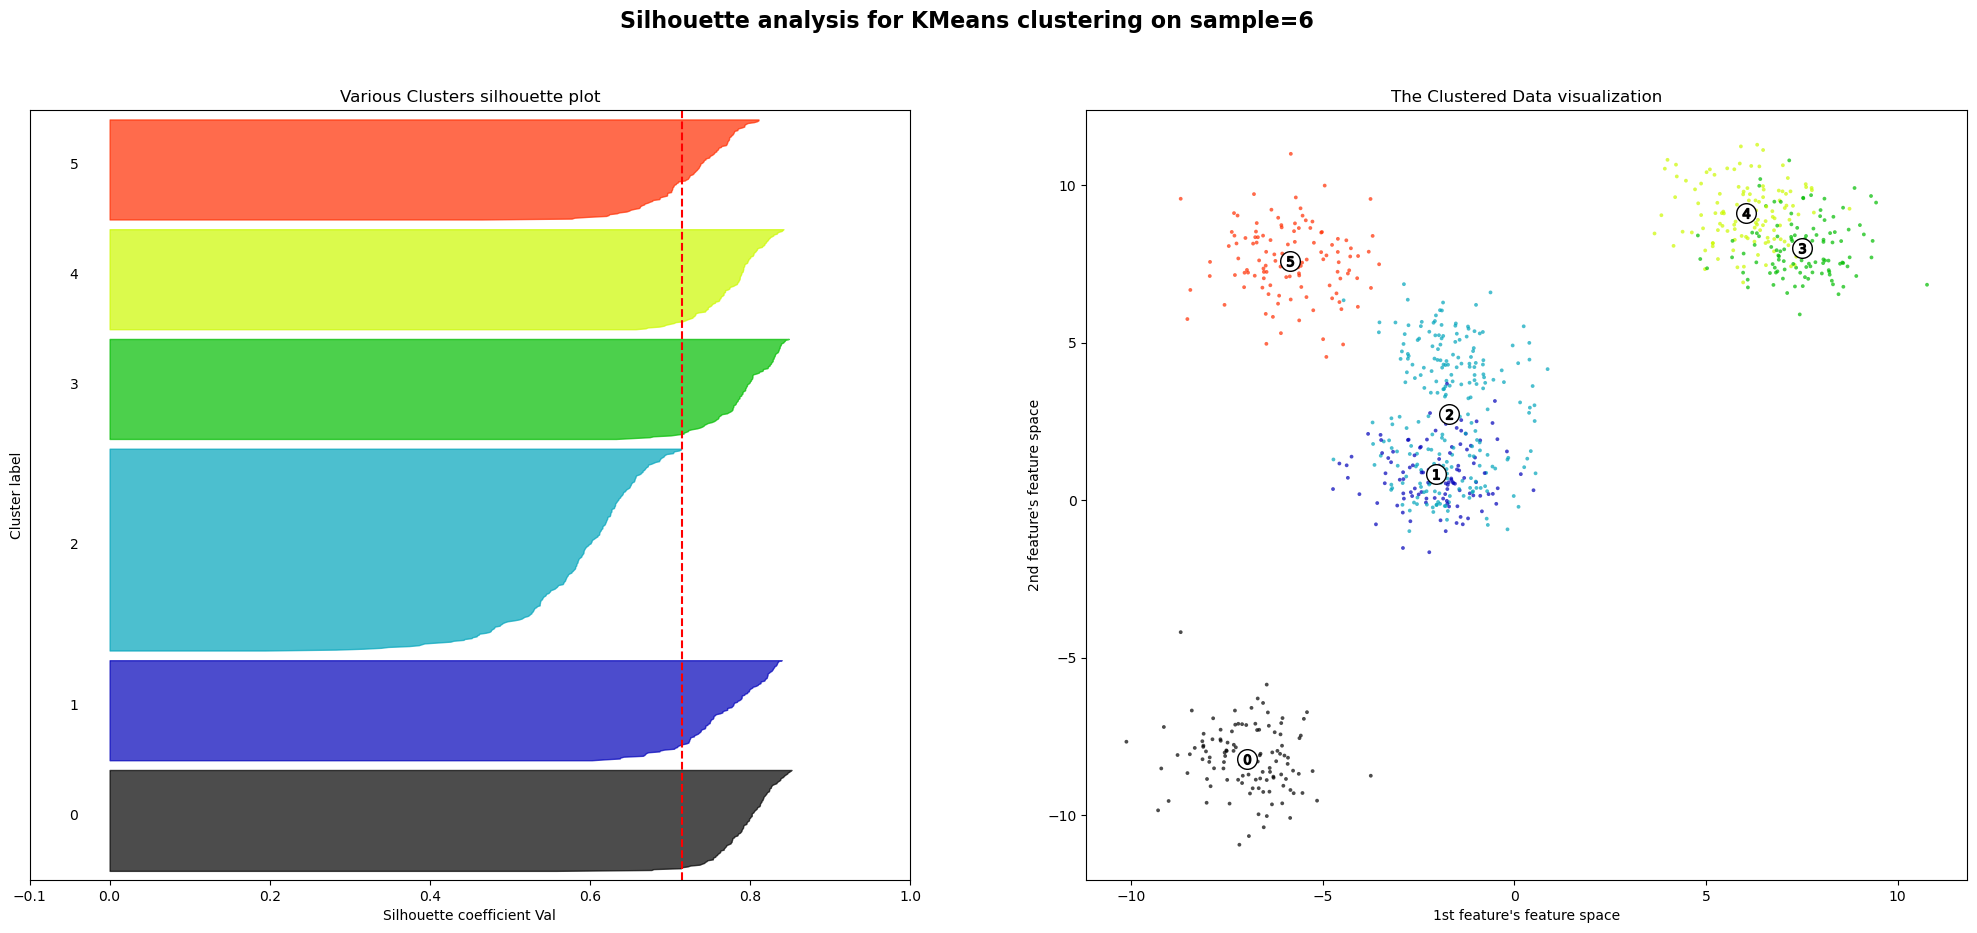

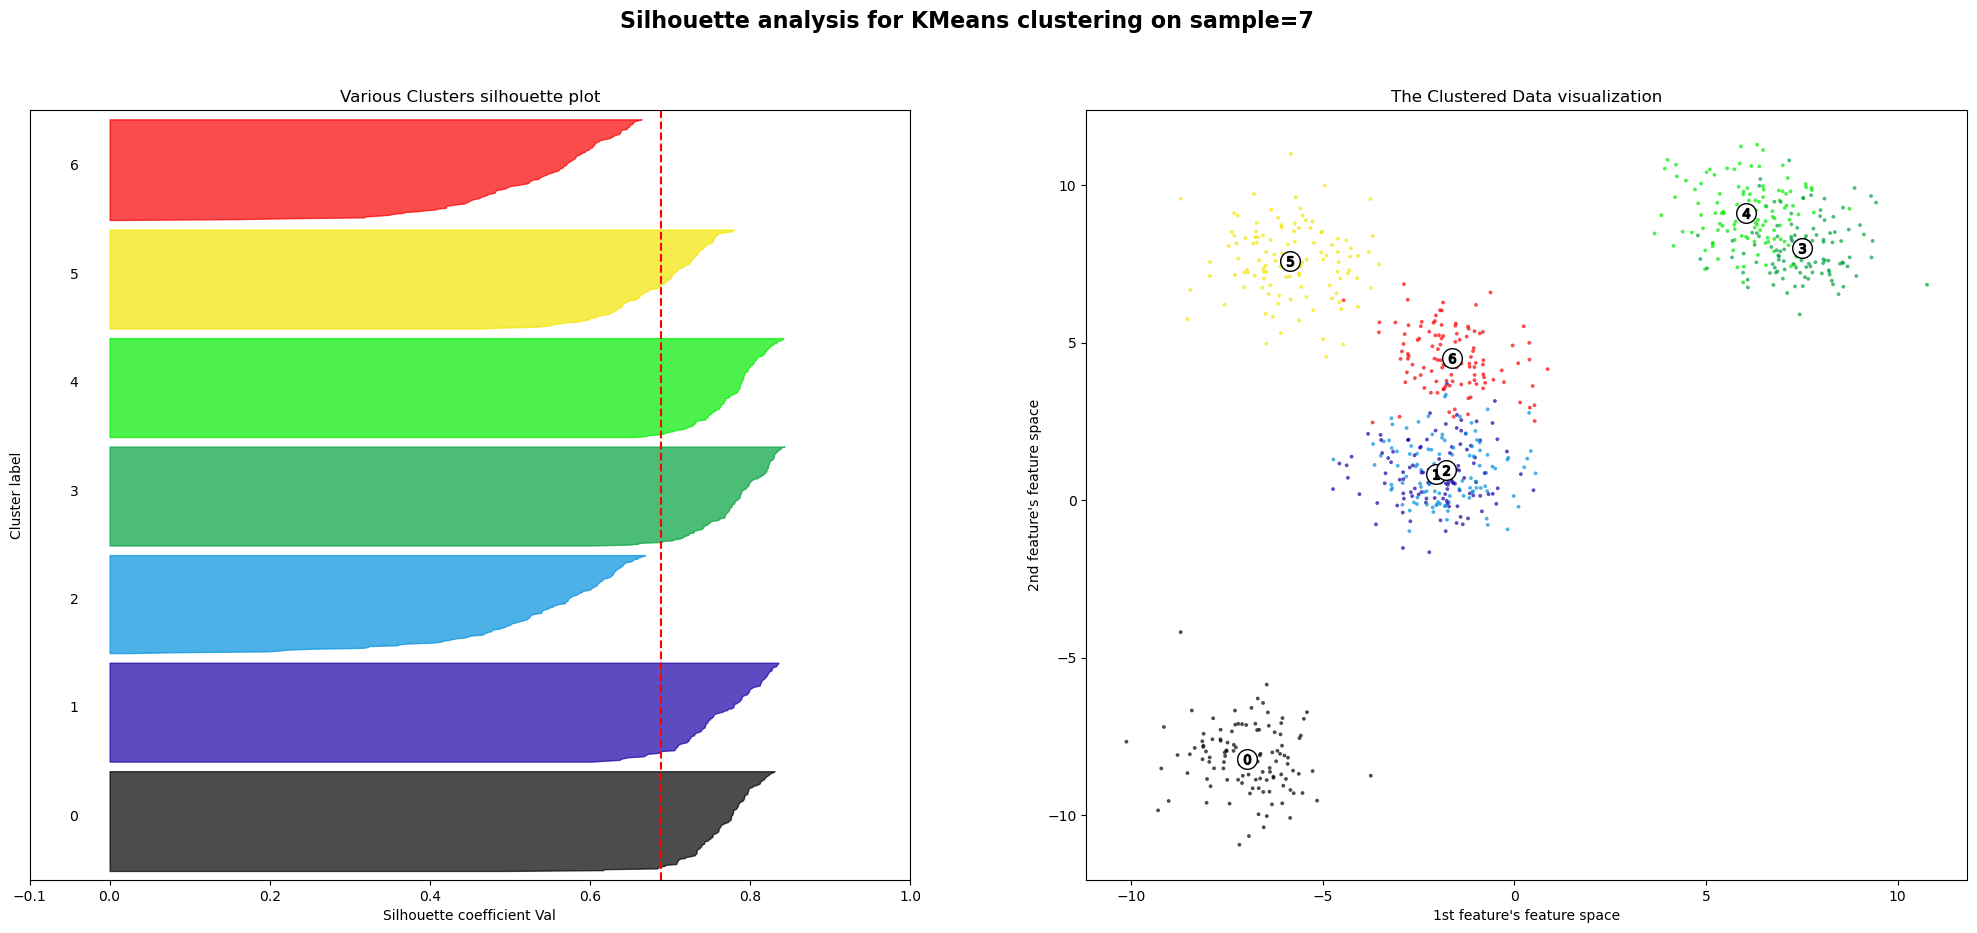

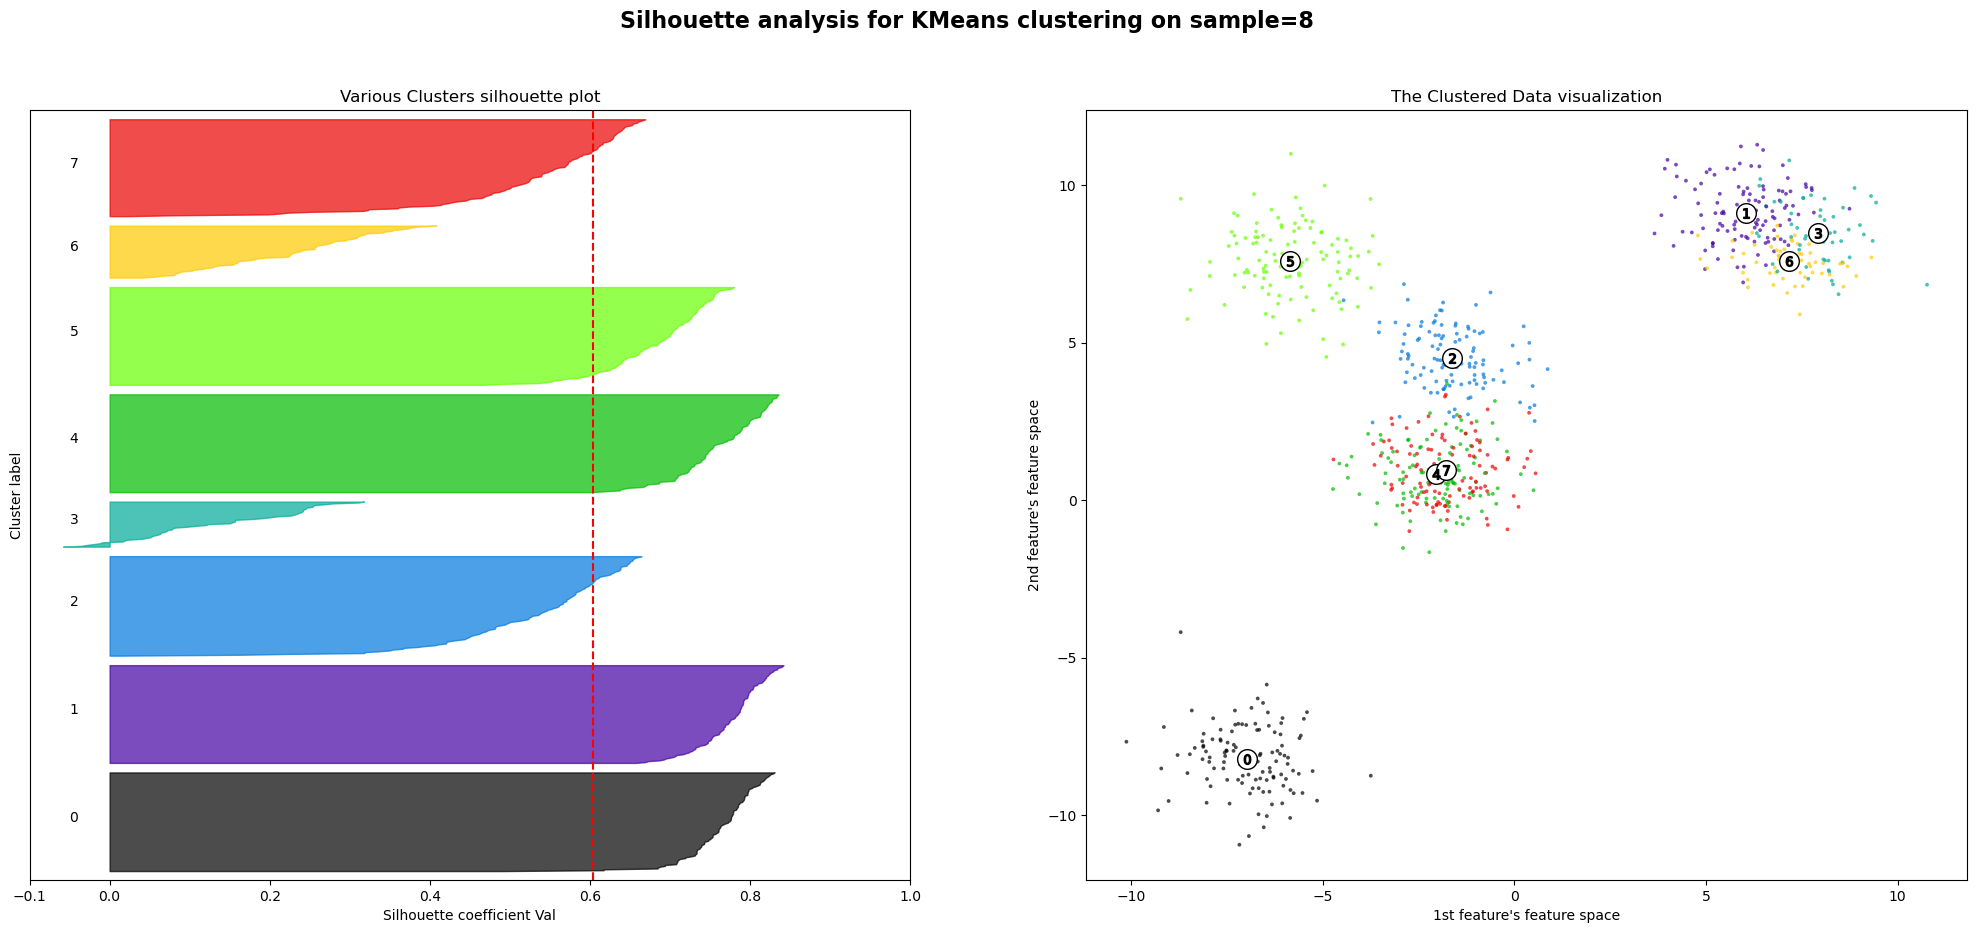

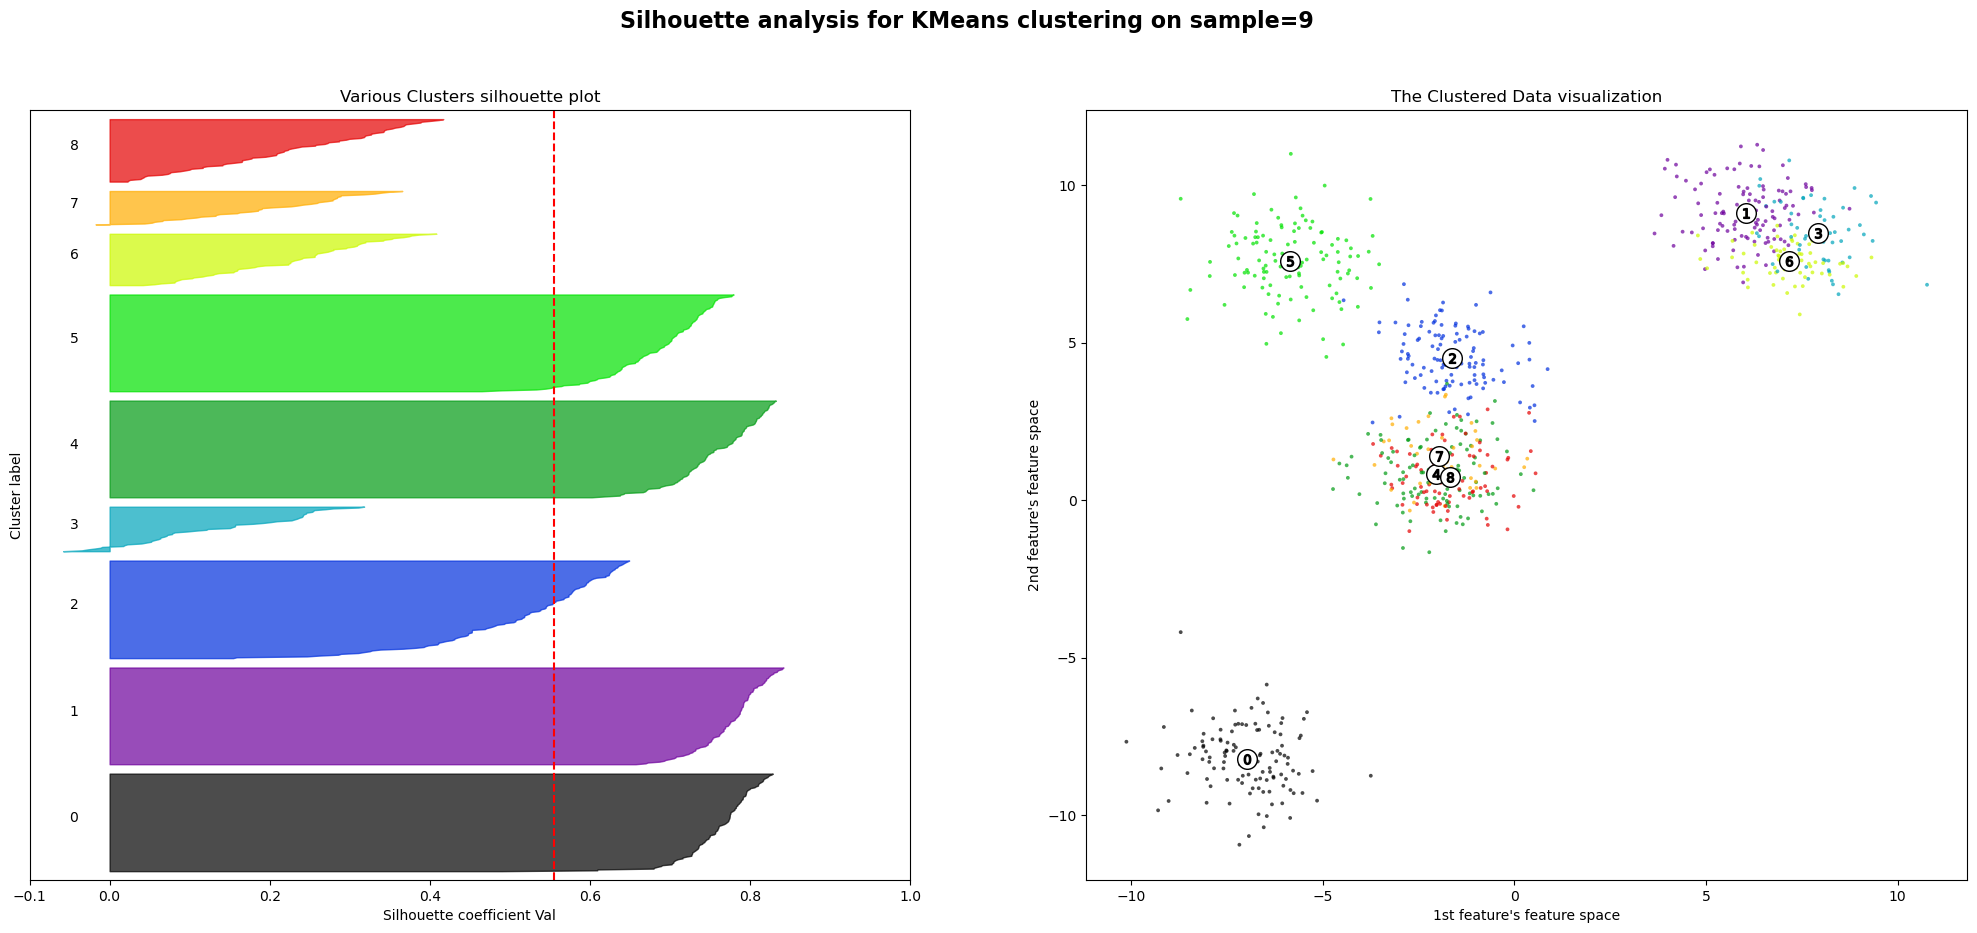

In [29]:
#silhouette code:

for clust in range_clust:
    #Creating a subplot: (1 row and 2 columns)
    pic, (x1, x2) = plt.subplots(1,2)
    pic.set_size_inches(25, 10)
    #The 1st subplot - silhouette plot
    #sil coeff range from -1 to 1 but here the range is [-0.1 to 1]
    x1.set_xlim([-0.1, 1])

    #To insert blank spaces b/w silhouette - we do (clust+1)*10
    x1.set_ylim([0, len(X) + (clust+1)*10])

    #Cluster intialization
    clustering = KMeans(n_clusters=clust, random_state=10)
    label_clust = clustering.fit_predict(X)
    #silhou score gives avg value for all samples
    #it gives idea on density and separation of formed clusters
    silh_avg = silhouette_score(X, label_clust)
    #X, predicted y
    print("For n iterations of clusters =", clust, "The avg silhouette score is :", silh_avg)
    #Sil score for each sample
    sample_sil_score = silhouette_samples(X, label_clust)
    lower_yval = 10
    #To display data properly in form of graphs:
    for i in range(clust):
        #aggregating the silh scores
        ith_clust_sil_val = \
             sample_sil_score[label_clust == i]
        ith_clust_sil_val.sort()
        size_clust_i = ith_clust_sil_val.shape[0]
        upper_yval = lower_yval + size_clust_i
        color = cm.nipy_spectral(float(i)/clust)
        x1.fill_betweenx(np.arange(lower_yval, upper_yval),
                         0, ith_clust_sil_val, 
                         facecolor=color, edgecolor=color, alpha=0.7)
        #label sil plots with cluster number
        x1.text(-0.05, lower_yval+0.5*size_clust_i, str(i))
        lower_yval=upper_yval+10
        
    x1.set_title("Various Clusters silhouette plot")
    x1.set_xlabel("Silhouette coefficient Val")
    x1.set_ylabel("Cluster label")
    #vertical line for avg of all val
    x1.axvline(x=silh_avg, color="red", linestyle="--")
    x1.set_yticks([])  #to clear
    x1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    color = cm.nipy_spectral(label_clust.astype(float)/clust)
    x2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=color, edgecolor='k')
    #label clust:
    centers = clustering.cluster_centers_
    #Drawing white circles at centroids
    x2.scatter(centers[:, 0], centers[:, 1], marker='o', c='white', alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        x2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    
    x2.set_title("The Clustered Data visualization")
    x2.set_xlabel("1st feature's feature space")
    x2.set_ylabel("2nd feature's feature space")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample=%d" % clust),
                fontsize=16, fontweight='bold')

plt.show()



In [30]:
#For n iterations of clusters = 6 The avg silhouette score is : 0.7149603735075293
#should not directly conclude this
#should check if any cluster is coming -ve

# 3,5,6 cluster - no -ve value
# take bigger number to get generalized one.

